<h1><center>CS 464</center></h1>
<h1><center>Introduction Machine Learning</center></h1>
<h1><center>Spring 2019</center></h1>
<h1><center>Homework 3</center></h1>

<h3><center>Due: May 21, 2019 23:59</center></h3>

## Instructions

<ul>
    <li>This homework contains both written and programming questions about neural networks. You should implement your programming questions on this notebook. Your plots should also be produced in this notebook. Each programming question has its own cell for your answer. You can implement your code directly in these cells. You should upload this .ipynb file with the computed output cells for each code cell.
    </li>
    <li>
        For questions that you need to plot, your plot results have to be included in cell output.
    </li>
    <li>
        It is <b>NOT ALLOWED</b> to use different libraries than given libraries which are defined in the required packages section.
    </li>
    <li>
        It is <b>NOT ALLOWED</b> to use a different deep learning framework than PyTorch.
    </li>
    <li>
        In this homework, you have to implement programming questions on <b>Python 3</b> version programming language.
    </li>
    <li>
        While submitting the homework file, please package your notebook(".ipynb") files as a gzipped TAR file or a ZIP file with the name CS464_HW3_Firstname_Lastname. Please do not use any Turkish letters for any of your files including code files and report file. Upload your homework to Moodle.
    </li>
    <li>
        Any violation of these rules may lead to significant grade deduction.
    </li>
    <li>
        if your code cell does not return outputs correctly, you will lose points for the corresponding question.
    </li>
    <li> You can send an email for your questions to <b>can.uner@bilkent.edu.tr</b> address.</li>
    <li> You can use Google Colab or your own local environment for this homework. You can prefer Google Colab since you have access to GPUs. You do not have to use GPUs to complete this homework though. If you prefer to use your local system, you should follow the below "Environmental Setup" instructions.</li>
</ul>

## Environment Setup

### Anaconda Installation

<ul>
    <li>Download anaconda from https://www.anaconda.com/download</li>
    <li>Follow the instructions provided in https://conda.io/docs/user-guide/install/index.html#regular-installation</li>
</ul>

### Creation of Virtual Environment

<ul>
    <li>Create python3.7 virtual environment for your hw3 using follow command from the command line<br>
        <i>> conda create -n HW3 python=3.7 anaconda</i></li>
    <li>Activate your virtual environment<br>
        <i>> source activate HW3</i></li>
    <li>To install auxiliary libraries create "requirements.txt" file which contains given required packages and run following command in the activated "hw3" environment<br>
        <i>> pip install -r requirements.txt<i></li>
     <li>When you create your virtual environment with "anaconda" metapackage, jupyter notebook should be installed. Try:<br>
         <i>> jupyter notebook</i>
</ul>

### Pytorch Installation

You should install PyTorch to your virtual environment which is created for the hw3. Therefore, you should activate your homework virtual environment before to start PyTorch installation.
<li>> source activate HW3</li>

After you have activated the virtual environment, then use one of the following commands to install pytorch for CPU for your system. See https://pytorch.org/ for help.
<ul>
<li>For MacOS:<br>
    <i>> conda install pytorch torchvision -c pytorch</i>
</li>
<li>For Linux:<br>
    <i>> conda install pytorch-cpu torchvision-cpu -c pytorch</i>
</li>
<li>For Windows:<br>
    <i>> conda install pytorch-cpu torchvision-cpu -c pytorch</i><br>
</li>

If your system has appropriate GPU Driver, CUDA and CuDNN installations, then you can use GPU supported PyTorch as well.

### Required Packages

Additional required packages except PyTorch and Torchvision are defined below.

In [0]:
from __future__ import print_function, division
import os
import torch
import time
import pandas as pd
from PIL import Image
import scipy
import numpy as np
import itertools
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torch.autograd import Variable
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data.sampler import SubsetRandomSampler
from torchvision import transforms, utils, datasets, models

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Images
!cp -R drive/My\ Drive/ML-HW3/indoor_data /content/

In [4]:
!ls

drive  indoor_data  sample_data


## Question 1 - 35 pts

In this question, you are going to implement a Convolutional Neural Network (CNN) to solve the indoor scene recognition problem. The provided subset of [MIT Indoor67 dataset](http://web.mit.edu/torralba/www/indoor.html) contains images of 10 indoor categories which are <i>bakery, toyshop, dining room, bathroom, library, pool inside, gym, bowling, computer room, hospital room.</i>

In this question, you are going to compare transfer learning and from scratch training approaches.

### Q1.a. Data Loader - 10 pts

We provide you a subset of MIT Indoor dataset. Download our version of MIT Indoor10 dataset from Moodle. You have to implement a custom data loader for the indoor dataset. You can visit [link](https://pytorch.org/tutorials/beginner/data_loading_tutorial.html) to implement such a data loader. There will be a comparison of training approaches in this question. <b>Both approaches have to use exactly the same splits (training, test, and validation) to make their performance results comparable.</b>

1. <font color=blue>\[Code\]</font> Split the dataset as training, test, and validation sets. For each class, 20% of its samples should be in test set and 10% of its samples should be in the validation set. 
2. <font color=blue>\[Code\]</font> Apply appropriate augmentations to the set(s) for which it is essential.
3. <font color=blue>\[Written\]</font> Give details about data loading and augmentation steps. How many training, test and validation samples do exist for each class? Do you need to apply augmentations for training, test, and validation sets? Why or why not?

In [0]:
# USE THIS CODE CELL TO SPECIFY ROOT PATH FOR THE DATASET.

# IF YOU USE GOOGLE COLAB, DATA PATH EXAMPLE: 
# root_dir = '/content/gdrive/My\ Drive/CS464/HW3/indoor_data'
# -------------------------------------------------------

# IF YOU USE LOCAL ENVIRONMENT, DATA PATH EXAMPLE:
# root_dir = '/home/user/CS464/HW3/indoor_data'
# -------------------------------------------------------
#root_dir = 'C:/Users/kerem/Desktop/HW3/indoor_data/' # change the value of root_dir variable as your root path
root_dir = '/content/indoor_data/'

In [0]:
def load_dataset(datadir, batch_size=None):
    sizes = []
    _, dirs, _ = next(os.walk(root_dir))
    for d in dirs:
        _, _, files = next(os.walk(os.path.join(root_dir, d)))
        sizes.append(len(files))
    sizes = np.array(sizes)
    data_transform = transforms.Compose([transforms.Resize(256), transforms.RandomCrop(224), transforms.ToTensor(), transforms.Normalize(([127.5,127.5,127.5]),[127.5,127.5,127.5])])
    
    train_data = datasets.ImageFolder(datadir, transform=data_transform) #70
    validation_data = datasets.ImageFolder(datadir, transform=data_transform) #10
    test_data = datasets.ImageFolder(datadir, transform=data_transform) #20
    
    train_total = []
    val_total = []
    test_total = []
    
    prev_size = 0
    for i in range(len(sizes)):
        indices = np.arange(sizes[i])
        train_split = int(np.floor(0.7 * sizes[i]))
        val_split = int(np.floor(0.8 * sizes[i]))   
        np.random.shuffle(indices)
        train_idx, val_idx, test_idx = indices[0:train_split], indices[train_split:val_split], indices[val_split:]
        #print("Train, Validation, Test")
        #print(len(train_idx), len(val_idx), len(test_idx))
        train_total = [*train_total, *(train_idx+prev_size)]
        val_total = [*val_total, *(val_idx+prev_size)]
        test_total = [*test_total, *(test_idx+prev_size)]
        prev_size += sizes[i]

    train_sampler = SubsetRandomSampler(train_total)
    val_sampler = SubsetRandomSampler(val_total)
    test_sampler = SubsetRandomSampler(test_total)
    
    if batch_size == None:
        trainloader = torch.utils.data.DataLoader(train_data, sampler=train_sampler, batch_size=len(train_data))
        valloader = torch.utils.data.DataLoader(validation_data, sampler=val_sampler, batch_size=len(validation_data))
        testloader = torch.utils.data.DataLoader(test_data, sampler=test_sampler, batch_size=len(test_data))
    else:
        trainloader = torch.utils.data.DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)
        valloader = torch.utils.data.DataLoader(validation_data, sampler=val_sampler, batch_size=batch_size)
        testloader = torch.utils.data.DataLoader(test_data, sampler=test_sampler, batch_size=batch_size)
    
    return trainloader,valloader, testloader

<b>Answer for Q1.a.3: </b> 

<b> Give details about data loading and augmentation steps. How many training, test and validation samples do exist for each class? Do you need to apply augmentations for training, test, and validation sets? Why or why not? </b>

<font>I used torchvision.datasets.ImageFolder class to load data with folder names as labels. It is very convenient to use. Then I randomly splitted the train and test dataset with the given 80-20 ratio. I used SubsetRandomSampler from torch library to shuffle the data. Then I use DataLoader class to load my final tensors for training and test data. I used 2 augmentation methods; Resize and RandomCrop. First I resized each image to 256 pixels with keeping aspect ratio, then I randomly cropped (224,224) pixels of each image to increase the performance of CNN that I train. After these operations each image have the size (224,224). Then I returned the final tensors by using ToTensor augmentation method. These methods are in torchvision.transform library. These are the number of train, validation and test instances for each class in our dataset. </font>

<table style="width:100%">
  <tr>
  	<th>Class</th>
    <th>Train</th>
    <th>Validation</th>
    <th>Test</th>
  </tr>
  <tr>
    <td>Bakery</td>
    <td>283</td>
    <td>41</td>
    <td>82</td>
  </tr>
  <tr>
    <td>Bathroom</td>
    <td>137</td>
    <td>20</td>
    <td>40</td>
  </tr>
  <tr>
    <td>Bowling</td>
    <td>149</td>
    <td>21</td>
    <td>43</td>
  </tr>
  <tr>
    <td>ComputerRoom</td>
    <td>79</td>
    <td>12</td>
    <td>23</td>
  </tr>
  <tr>
    <td>DiningRoom</td>
    <td>191</td>
    <td>28</td>
    <td>55</td>
  </tr>
  <tr>
    <td>Gym</td>
    <td>161</td>
    <td>23</td>
    <td>47</td>
  </tr>
  <tr>
    <td>HospitalRoom</td>
    <td>70</td>
    <td>10</td>
    <td>21</td>
  </tr>
  <tr>
    <td>Library</td>
    <td>74</td>
    <td>11</td>
    <td>22</td>
  </tr>
  <tr>
    <td>PoolInside</td>
    <td>121</td>
    <td>18</td>
    <td>35</td>
  </tr>
  <tr>
    <td>ToyStore</td>
    <td>242</td>
    <td>35</td>
    <td>70</td>
  </tr>
  <tr style="font-weight:bold">
    <td>Total</td>
    <td>1507</td>
    <td>219</td>
    <td>437</td>
  </tr>
</table>

### Q1.b. Convolutional Neural Network (CNN) - 5 pts

The torchvision package contains of popular datasets, model architectures, and common image transformations for computer vision. In this question, you are going to use one of the well known CNN models which already exist in torchvision. Visit [link](https://pytorch.org/docs/stable/torchvision/models.html) to explore models in torchvision. Remember that using deeper or wider networks may increase your training time.
1. <font color=blue>\[Code\]</font> Write your own CNN class which is inherited from torch.nn.Module class. This class should have a network that you select among torchvision models as an instance member.
2. <font color=blue>\[Written\]</font> State the model you selected and explain why you picked that model. Did you need to modify any part of this model to adopt to your task? 

In [0]:
# USE THIS CODE CELL TO DEFINE CNN CLASS
class CNN(torch.nn.Module):
    
    #Our batch shape for input x is (3, 224, 224)
    
    def __init__(self):
        super(CNN, self).__init__()
        
        self.layer1 = torch.nn.Sequential(
            torch.nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))
        
        self.layer2 = torch.nn.Sequential(
            torch.nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))
        
        self.layer3 = torch.nn.Sequential(
            torch.nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))
        
        self.layer4 = torch.nn.Sequential(
            torch.nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))
        
        self.layer5 = torch.nn.Sequential(
            torch.nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))
        
        self.classifier = torch.nn.Sequential(
            torch.nn.Linear(128 * 7 * 7, 4096),
            torch.nn.ReLU(True),
            torch.nn.Dropout(),
            torch.nn.Linear(4096, 4096),
            torch.nn.ReLU(True),
            torch.nn.Dropout(),
            torch.nn.Linear(4096, 10),
        )
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = self.layer5(out)
        out = out.view(out.size(0), -1)
        out = self.classifier(out)
        return out

<b>Answer Q1.b.2:</b>

<b>State the model you selected and explain why you picked that model. Did you need to modify any part of this model to adopt to your task?.</b>

<font>I choosed to use an architecture known as "VGG-11". The main reason for that choice is it is a small but accurate model. I tried many different models however they require much more computation power (CPU, GPU, RAM). VGG-11 fits well for that task. I modified number of kernels at each convolutional layer to reduce the computation demand of the model. I reduced number of kernels at each convolutional layer by factor of 4 since in the original version GPU was not enough to perform training task in Google Colab environment. Other parts of the model are same with the original model.

I choosed densenet121 model for transfer learning part. I changed its classification layers which are called fully-connected layers. Then I trained it with the same procedure that I applied to from scratch model.</font>

### Q1.c. Transfer Learning vs Training from Scratch - 13 pts

In this question, are going to compare two different learning approaches: Transfer learning and Learning from scratch. Thanks to using the already implemented CNN model from torchvision, you can easily convert your randomly initialized network to a pretrained network. Do not forget that you are going to solve a multiclass classification problem. According to that, you need to carefully select the appropriate loss function. You need to select appropriate values for hyper-parameters. You need to use SGD optimizer for this question. Use the training, validation and test splits you created Q1.a. Note that you will NOT perform cross validation. Evaluate your network performance after each epoch by using the validation set. Use matplotlib library for plotting figures.

1. <font color=blue>\[Code\]</font> Implement training and validation functions for both strategies. You have to print out average values of training loss, training accuracy, validation loss and validation accuracy for each epoch.
2. <font color=blue>\[Figure\]</font> For the from-scratch-trained model, plot training loss and training accuracy of each iteration (update). Also plot validation loss and accuracy at each epoch. 
3. <font color=blue>\[Figure\]</font> For the transfer learning applied model, plot training loss and training accuracy of each iteration (each update). Also plot validation loss and accuracy at each epoch.
4. <font color=blue>\[Code\]</font> Your models are going to run up to the max epoch parameter.  According to the validation results, pick the best models for both training approaches. You are going to use these models at the test phase. You need to save them in ".pth" files.
5. <font color=blue>\[Written\]</font> Which loss function did you use? Why did you choose it?
6. <font color=blue>\[Written\]</font> What are the differences between transfer learning and from scratch learning.
7. <font color=blue>\[Written\]</font> Explain how you selected hyperparameters for both strategies. Did you need to make any hyperparameter changes? 

In [0]:
FROM_SCRATCH_MODEL_PATH = 'own_model.pth' # change the value of FROM_SCRATCH_MODEL_PATH variable as your path
TRANSFER_LEARNING_MODEL_PATH = 'transfer_model.pth' # change the value of TRANSFER_LEARNING_MODEL_PATH variable as your path

### From Scratch Model

In [0]:
def accuracy(output, target, topk=(1,)):
    with torch.no_grad():
        maxk = max(topk)
        batch_size = target.size(0)
        _, pred = output.topk(maxk, 1, True, True)
        pred = pred.t()
        correct = pred.eq(target.view(1, -1).expand_as(pred))
        res = []
        for k in topk:
            correct_k = correct[:k].view(-1).float().sum(0, keepdim=True)
            res.append(correct_k.mul_(100.0 / batch_size))
        return res

In [0]:
def train(model, learning_rate):
    #Loss function and optimizer
    loss = torch.nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)   
    
    batch_loss = []
    batch_acc = []    
    
    for i, data in enumerate(train_loader, 0):
        #Set the parameter gradients to zero
        optimizer.zero_grad()

        #Forward pass, backward pass, optimize
        outputs = model(data[0].cuda())
        tot_loss = loss(outputs, data[1].cuda())
        tot_loss.backward()
        optimizer.step()

        batch_loss.append(tot_loss.item())
        batch_acc.append(accuracy(outputs, data[1].cuda(), (5,))[0].item())

    # Loss and Accuracy
    train_loss = np.sum(batch_loss)/len(batch_loss)
    train_accuracy = np.sum(batch_acc)/len(batch_acc)
    
    return train_loss, train_accuracy          

In [0]:
def evaluate(model):
    #Loss function and optimizer
    loss = torch.nn.CrossEntropyLoss()
    
    v_batch_loss = []
    v_batch_acc = []
    model.eval()
    with torch.no_grad():
        for images, labels in val_loader:
            outputs = model(images.cuda())
            v_loss = loss(outputs, labels.cuda())
            v_batch_loss.append(v_loss.item())
            v_batch_acc.append(accuracy(outputs, labels.cuda(), (5,))[0].item())

        validation_loss = np.sum(v_batch_loss)/len(v_batch_loss)
        validation_accuracy = np.sum(v_batch_acc)/len(v_batch_acc)

        return validation_loss, validation_accuracy   

In [80]:
# Hyperparameters
n_epochs = 50
learning_rate = 0.01
batch_size = 64

# Load Data
train_loader, val_loader, _ = load_dataset(root_dir, batch_size)

# Load Model
model = CNN()
model.cuda()

print("Training Started\n")
tr_loss = []
tr_acc = []

val_loss = []
val_acc = []

# Train the model
total_step = len(train_loader)

# Each Epoch
for epoch in range(n_epochs):
    torch.cuda.empty_cache()
    train_loss, train_accuracy = train(model, learning_rate)
    validation_loss, validation_accuracy = evaluate(model)
    
    print('Epoch [{}/{}], Num_Batch [{}]' .format(epoch + 1, n_epochs, total_step))
    
    print('Training Loss: {:.4f}, Training Accuracy: {:.2f}%' .format(train_loss, train_accuracy))
    tr_loss.append(train_loss)
    tr_acc.append(train_accuracy)
    
    print('Validation Loss: {:.4f}, Validation Accuracy: {:.2f}%\n' .format(validation_loss, validation_accuracy))
    val_loss.append(validation_loss)
    val_acc.append(validation_accuracy)
    
print("Training Ended")
torch.save(model.state_dict(), FROM_SCRATCH_MODEL_PATH)

Training Started

Epoch [1/50], Num_Batch [24]
Training Loss: 2.2890, Training Accuracy: 61.59%
Validation Loss: 2.2662, Validation Accuracy: 67.69%

Epoch [2/50], Num_Batch [24]
Training Loss: 2.2564, Training Accuracy: 67.06%
Validation Loss: 2.2383, Validation Accuracy: 69.30%

Epoch [3/50], Num_Batch [24]
Training Loss: 2.2345, Training Accuracy: 66.82%
Validation Loss: 2.2377, Validation Accuracy: 65.02%

Epoch [4/50], Num_Batch [24]
Training Loss: 2.2228, Training Accuracy: 67.86%
Validation Loss: 2.2109, Validation Accuracy: 67.16%

Epoch [5/50], Num_Batch [24]
Training Loss: 2.2138, Training Accuracy: 68.08%
Validation Loss: 2.1966, Validation Accuracy: 68.76%

Epoch [6/50], Num_Batch [24]
Training Loss: 2.2082, Training Accuracy: 68.19%
Validation Loss: 2.1923, Validation Accuracy: 70.91%

Epoch [7/50], Num_Batch [24]
Training Loss: 2.2069, Training Accuracy: 68.08%
Validation Loss: 2.1940, Validation Accuracy: 69.30%

Epoch [8/50], Num_Batch [24]
Training Loss: 2.2064, Traini

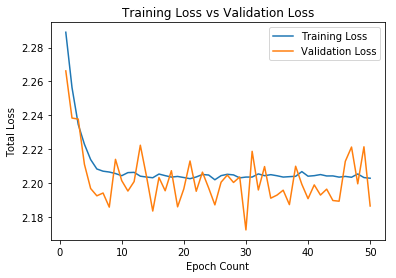

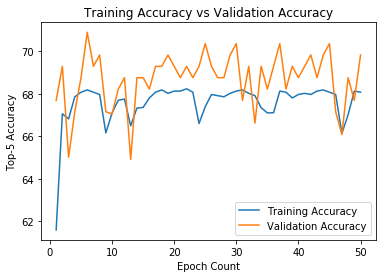

In [81]:
epochs = np.arange(n_epochs)+1
f = plt.figure()
ax = f.add_subplot(111)
ax.plot(epochs, tr_loss, '-', label="Training Loss")
ax.plot(epochs,val_loss, '-', label="Validation Loss")
ax.legend()

ax.set_xlabel('Epoch Count')
ax.set_ylabel('Total Loss')
ax.set_title('Training Loss vs Validation Loss')

g = plt.figure()
bx = g.add_subplot(111)
bx.plot(epochs, tr_acc, '-', label="Training Accuracy")
bx.plot(epochs, val_acc, '-', label="Validation Accuracy")
bx.legend()

bx.set_xlabel('Epoch Count')
bx.set_ylabel('Top-5 Accuracy')
bx.set_title('Training Accuracy vs Validation Accuracy')
print()

### Transfer Learning

In [0]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#pretrained=True will download a pretrained network for us
model = models.densenet121(pretrained=True)

#Freezing model parameters and defining the fully connected network to be attached to the model, loss function and the optimizer.
#We there after put the model on the GPUs
for param in model.parameters():
    param.require_grad = False
fc = torch.nn.Sequential(
    torch.nn.Linear(1024, 460),
    torch.nn.ReLU(),
    torch.nn.Dropout(0.4),
    
    torch.nn.Linear(460,10),
    torch.nn.LogSoftmax(dim=1))

model.classifier = fc
criterion = torch.nn.NLLLoss()
#Over here we want to only update the parameters of the classifier so
optimizer = torch.optim.Adam(model.classifier.parameters(), lr=0.003)
model.to(device)

In [91]:
#Training the model and saving checkpoints of best performances. That is lower validation loss and higher accuracy
n_epochs = 20
valid_loss_min = np.Inf
total_step = len(train_loader)

all_train_loss = []
all_train_acc = []

all_val_loss = []
all_val_acc = []

for epoch in range(n_epochs):
        
    model.train()
    
    tr_loss = 0.0
    val_loss = 0.0
    tr_accuracy = 0
    val_accuracy = 0

    for inputs, labels in train_loader:
        
        # Move input and label tensors to the default device
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        logps = model(inputs)
        loss = criterion(logps, labels)
        loss.backward()
        optimizer.step()
        tr_loss += loss.item() 
        
        # Calculate accuracy
        ps = torch.exp(logps)
        top_p, top_class = ps.topk(1, dim=1)
        equals = top_class == labels.view(*top_class.shape)
        tr_accuracy += torch.mean(equals.type(torch.FloatTensor)).item()
        
    model.eval()
    
    with torch.no_grad():
        for inputs, labels in val_loader:
            
            inputs, labels = inputs.to(device), labels.to(device)
            logps = model.forward(inputs)
            batch_loss = criterion(logps, labels)
            val_loss += batch_loss.item()
            
            # Calculate accuracy
            ps = torch.exp(logps)
            top_p, top_class = ps.topk(1, dim=1)
            equals = top_class == labels.view(*top_class.shape)
            val_accuracy += torch.mean(equals.type(torch.FloatTensor)).item()
                    
    
    # calculate average losses
    train_loss = tr_loss/len(train_loader)
    train_accuracy = tr_accuracy/len(train_loader)
    val_loss = val_loss/len(val_loader)
    val_accuracy = val_accuracy/len(val_loader) 
    
    # print training/validation statistics 
    print('Epoch [{}/{}], Num_Batch [{}]' .format(epoch + 1, n_epochs, total_step))
    print('Training Loss: {:.6f} \t Training Accuracy {:.6f} \nValidation Loss: {:.6f} \tValidation Accuracy: {:.6f}\n'.format(train_loss, train_accuracy, val_loss, val_accuracy))
    all_train_loss.append(train_loss)
    all_train_acc.append(train_accuracy)
    all_val_loss.append(val_loss)
    all_val_acc.append(val_accuracy)
    
    if val_loss <= valid_loss_min:
        torch.save(model.state_dict(), TRANSFER_LEARNING_MODEL_PATH)
        valid_loss_min = val_loss   

Epoch [1/20], Num_Batch [24]
Training Loss: 0.615298 	 Training Accuracy 0.793099 
Validation Loss: 0.863275 	Validation Accuracy: 0.717448

Epoch [2/20], Num_Batch [24]
Training Loss: 0.681005 	 Training Accuracy 0.761421 
Validation Loss: 0.763471 	Validation Accuracy: 0.725260

Epoch [3/20], Num_Batch [24]
Training Loss: 0.577310 	 Training Accuracy 0.806436 
Validation Loss: 0.788957 	Validation Accuracy: 0.753038

Epoch [4/20], Num_Batch [24]
Training Loss: 0.560547 	 Training Accuracy 0.809487 
Validation Loss: 0.727177 	Validation Accuracy: 0.759404

Epoch [5/20], Num_Batch [24]
Training Loss: 0.653106 	 Training Accuracy 0.770666 
Validation Loss: 0.811389 	Validation Accuracy: 0.751157

Epoch [6/20], Num_Batch [24]
Training Loss: 0.612938 	 Training Accuracy 0.795275 
Validation Loss: 0.913847 	Validation Accuracy: 0.701389

Epoch [7/20], Num_Batch [24]
Training Loss: 0.598584 	 Training Accuracy 0.792243 
Validation Loss: 0.867059 	Validation Accuracy: 0.730613

Epoch [8/20],

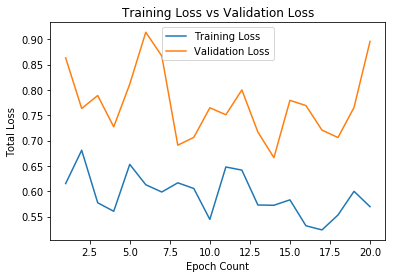

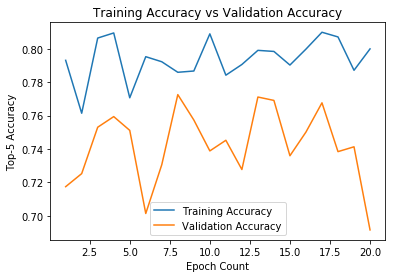

In [92]:
epochs = np.arange(n_epochs)+1
f = plt.figure()
ax = f.add_subplot(111)
ax.plot(epochs, all_train_loss, '-', label="Training Loss")
ax.plot(epochs, all_val_loss, '-', label="Validation Loss")
ax.legend()

ax.set_xlabel('Epoch Count')
ax.set_ylabel('Total Loss')
ax.set_title('Training Loss vs Validation Loss')

g = plt.figure()
bx = g.add_subplot(111)
bx.plot(epochs, all_train_acc, '-', label="Training Accuracy")
bx.plot(epochs, all_val_acc, '-', label="Validation Accuracy")
bx.legend()

bx.set_xlabel('Epoch Count')
bx.set_ylabel('Top-5 Accuracy')
bx.set_title('Training Accuracy vs Validation Accuracy')
print()

<b>Answer for Q1.c.5:</b>

<b>Which loss function did you use? Why did you choose it?</b>

<font>I used Cross Entropy Loss as a loss function in my Convolutional Neural Network model. The main reason that I choose Cross Entropy Loss is that it is the best loss function for multi-class classification problems. Since we have 10 different output labels, it is not suitable to use loss functions like L1, L2. </font>

<b>Answer for Q1.c.6:</b>

<b>What are the differences between transfer learning and from scratch learning.</b>

<font>In from scratch learning, model also learned what are the hidden features of the given image. In that model, the convolution layers are also trained with the chosen loss function and back-propogation whereas in the transfer learning, only the fully-connected layers are trained; hidden features are taken from another pre-trained Convolutional Neural Netwok. Thus training transfer learning model is much easier than training from scratch model.</font>

<b>Answer for Q1.c.7:</b>

<b> Explain how you selected hyperparameters for both strategies. Did you need to make any hyperparameter changes?</b>

<font> I searched from Internet to find best hyperparameters for the given architectures. Also I observed the accuracy and loss values in each epoch. 
    
* For learning rate I tried 4 different learning rate values: [0.1, 0.01, 0.001, 0.0001]. 0.1 is to large and it sometimes missed the optimal loss value while 0.001 and 0.0001 are too small so that training takes too long and it requires more number of epochs. So I decided to use 0.01 as learning rate.

* For batch size,  I choosed 64. I cannot make it bigger than 100 since GPU memory of the Google Colab environment is not enough to train bigger batches. I tried [100,64,32] and best results that I take are with the ones that have batch size 64.

* For number of epochs, I observed loss and accuracy and as they could be seen from the figure above, after epoch 5-10, loss and algoritm converges. Thus I used 10-15 epochs.</font>

### Q1.d. Test Classifiers - 7 pts

You should have obtained two trained networks so far. One of them comes from a transfer learning approach and the other network is from from-scratch-trained approach. In this case, you need to compare these two trained networks by using the test set.

1. <font color=blue>\[Code\]</font> Load saved '.pth' file for the model that trained with the transfer learning approach. Test this model by using the test set.
2. <font color=blue>\[Code\]</font> Load saved '.pth' file for the model that trained from scratch. Test this model by using the test set.
3. <font color=blue>\[Figure\]</font> Provide confusion matrix for the results of [1.] question.
4. <font color=blue>\[Figure\]</font> Provide confusion matrix for the results of [2.] question.
5. <font color=blue>\[Figure\]</font> Display randomly selected 20 images from the test set with the predicted and ground truth labels. Show these images in a grid (4x5).
6. <font color=blue>\[Written\]</font> Give the test set accuracy values for these two models. Which training approach does work better than the other? Explain why?

In [0]:
# USE THIS CODE CELL TO IMPLEMENT TEST FUNCTION WHICH IS COMMON FOR BOTH MODEL

# --- Representative Code Snippet ---
# def test(**kwargs):

In [0]:
# USE THIS CODE CELL TO LOAD BEST MODEL WHICH USES TRANSFER LEARNING APPROACH
# LOAD TEST SAMPLES
# GET THE TEST RESULTS, PRINT OUT TEST METRICS

# --- Representative Code Snippet ---
# testloader = torch.utils.data.DataLoader(test_dataset, batch_size=n_batch, num_workers=n_workers)
# model = YourCNNClass(**kwargs)
# model.load_state_dict(torch.load(TRANSFER_LEARNING_MODEL_PATH))
# model.eval()
# test(model)

In [0]:
# USE THIS CODE CELL TO LOAD BEST MODEL WHICH IS TRAINED FROM SCRATCH
# LOAD TEST SAMPLES
# GET THE TEST RESULTS, PRINT OUT TEST METRICS

# --- Representative Code Snippet ---
# testloader = torch.utils.data.DataLoader(test_dataset, batch_size=n_batch, num_workers=n_workers)
# model = YourCNNClass(**kwargs)
# model.load_state_dict(torch.load(FROM_SCRATCH_MODEL_PATH))
# model.eval()
# test(model)

In [0]:
# USE THIS CODE CELL TO CREATE CONFUSION MATRIX [Answer: Q1.d.3]
# YOU CAN USE sklearn.metrics package to compute confusion matrix

In [0]:
# USE THIS CODE CELL TO CREATE CONFUSION MATRIX [Answer: Q1.d.4]
# YOU CAN UbSE sklearn.metrics package to compute confusion matrix

In [0]:
# USE THIS CODE CELL TO DISPLAY RANDOMLY SELECTED TEST SAMPLES WITH THEIR PREDICTED AND TARGET LABELS [Answer: Q1.d.5]

<b>Answer for Q1.d.6:</b>

<b>USE THIS MARKDOWN CELL TO GIVE YOUR ANSWER FOR THE WRITTEN QUESTION.</b>

<font color=blue>Double click to this text to write your answer !!!</font>

## Question 2 - 65 pts

In this question, you are going to implement both a Convolutional Neural Network (CNN) architecture and a Multilayer Perceptron (MLP) to solve the bird type classification problem. As the dataset, you will use [Caltech-UCSD Birds-200-2011](http://www.vision.caltech.edu/visipedia/CUB-200-2011.html) dataset. The dataset consists of 11.788 photos of 200 bird species. The dataset provides you bounding boxes, image labels, and training-test splits. DO NOT FORGET THAT YOU WILL NOT USE TRAINING-TEST SPLIT WHICH IS PROVIDED BY DATASET. YOU WILL SPLIT THE DATASET INTO TRAINING, TEST AND VALIDATION SETS YOURSELF.

You are free to choose your neural network architecture in this question but there will be a minimum performance threshold and your network's performance will affect your grade for this question. The thresholds and metric types are specified in corresponding questions.

<b>Note: You should be able to achieve these goals with training time < a day on a GPU.</b>

### Q2.a. Data Loader - 15 pts

In this question you are going to use [Caltech-UCSD Birds-200-2011](http://www.vision.caltech.edu/visipedia/CUB-200-2011.html) dataset. Download the dataset from given [link](http://www.vision.caltech.edu/visipedia/CUB-200-2011.html). You have to implement a custom data loader. Notice that photos are not tightly cropped. You may choose to crop images by using bounding boxes which exist in the dataset. Note that you will build CNN and MLP architectures and input types should be different for these networks. You should prepare data loaders by considering this situation. You may need to convert images to grayscale format to train the MLP model. <b>MLP and CNN architectures have to use exactly the same splits (training, test, and validation) to make their performance results comparable.</b>

1. <font color=blue>\[Code\]</font> Split the dataset as training, test, and validation sets. For each class, 20% of its samples should be in test set and 10% of its samples should be in the validation set. 
2. <font color=blue>\[Code\]</font> Apply appropriate augmentations to the set(s) for which it is essential.
3. <font color=blue>\[Written\]</font> Explain your augmentation method differences for two models? 



In [161]:
# USE THIS CODE CELL TO SPECIFY ROOT PATH FOR THE DATASET.

# IF YOU USE GOOGLE COLAB, DATA PATH EXAMPLE: 
# root_dir = '/content/gdrive/My\ Drive/CS464/HW3/CUB_200_2011'
# -------------------------------------------------------


# IF YOU USE LOCAL ENVIRONMENT, DATA PATH EXAMPLE:
# root_dir = '/home/user/CS464/HW3/CUB_200_2011'
# -------------------------------------------------------

root_dir = 'C:\\Users\\kerem\\Desktop\\HW3\\CUB_200_2011' # change the value of root_dir variable as your root path

In [178]:
def load_dataset(datadir, batch_size):
    sizes = []
    _, dirs, _ = next(os.walk(datadir))
    for d in dirs:
        _, _, files = next(os.walk(os.path.join(datadir, d)))
        sizes.append(len(files))
    sizes = np.array(sizes)

    mlp_data_transform = transforms.Compose([transforms.Resize(256), transforms.RandomCrop(224), transforms.Grayscale(1), transforms.ToTensor()])
    cnn_data_transform = transforms.Compose([transforms.Resize(256), transforms.RandomCrop(224), transforms.ToTensor()])

    cnn_train_data = datasets.ImageFolder(datadir, transform=cnn_data_transform) #70
    cnn_validation_data = datasets.ImageFolder(datadir, transform=cnn_data_transform) #10
    cnn_test_data = datasets.ImageFolder(datadir, transform=cnn_data_transform) #20
    
    mlp_train_data = datasets.ImageFolder(datadir, transform=mlp_data_transform) #70
    mlp_validation_data = datasets.ImageFolder(datadir, transform=mlp_data_transform) #10
    mlp_test_data = datasets.ImageFolder(datadir, transform=mlp_data_transform) #20
    
    train_total = []
    val_total = []
    test_total = []
    
    prev_size = 0
    for i in range(len(sizes)):
        indices = np.arange(sizes[i])
        train_split = int(np.floor(0.7 * sizes[i]))
        val_split = int(np.floor(0.8 * sizes[i]))   
        np.random.shuffle(indices)
        train_idx, val_idx, test_idx = indices[0:train_split], indices[train_split:val_split], indices[val_split:]
        train_total = [*train_total, *(train_idx+prev_size)]
        val_total = [*val_total, *(val_idx+prev_size)]
        test_total = [*test_total, *(test_idx+prev_size)]
        prev_size += sizes[i]

    train_sampler = SubsetRandomSampler(train_total)
    val_sampler = SubsetRandomSampler(val_total)
    test_sampler = SubsetRandomSampler(test_total)
    
    cnn_trainloader = torch.utils.data.DataLoader(cnn_train_data, sampler=train_sampler, batch_size=batch_size)
    cnn_valloader = torch.utils.data.DataLoader(cnn_validation_data, sampler=val_sampler, batch_size=batch_size)
    cnn_testloader = torch.utils.data.DataLoader(cnn_test_data, sampler=test_sampler, batch_size=batch_size)

    mlp_trainloader = torch.utils.data.DataLoader(mlp_train_data, sampler=train_sampler, batch_size=batch_size)
    mlp_valloader = torch.utils.data.DataLoader(mlp_validation_data, sampler=val_sampler, batch_size=batch_size)
    mlp_testloader = torch.utils.data.DataLoader(mlp_test_data, sampler=test_sampler, batch_size=batch_size)

    return cnn_trainloader,cnn_valloader, cnn_testloader, mlp_trainloader, mlp_valloader, mlp_testloader

In [179]:
cnn_t, cnn_v, cnn_e, mlp_t, mlp_v, mlp_e = load_dataset(os.path.join(root_dir,"images"), 400)

Sample mlp processed image


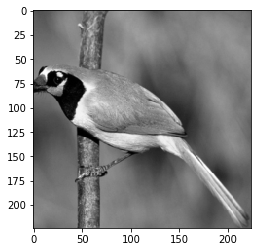

In [200]:
for i in mlp_e:
    img = i[0][0][0].cpu().detach().numpy()
    print("Sample mlp processed image")
    plt.imshow(Image.fromarray(img),cmap='gray')
    break

<b>Answer for Q2.a.3: </b> 

<b> Explain your augmentation method differences for two models?</b>

<font>For MLP model; images are rescaled to (256,256) dimension, then they are cropped randomly into (224,224) dimension. Then images are converted into grayscale format and thresholding is applied. Threshold is 120. Then finally images are converted to tensor.

For CNN model; images are again rescaled and randomly cropped. Then they are converted to tensor to make them suitable for training.

Differences are in MLP pre-processing. I added Sobel Filtering and Thresholding. With that I aim to increase the performance of the MLP model since it is simpler model, applying same pre-processings may cause MLP model to underfit.</font>

### Q2.b. Multilayer Perceptron - 5 pts

Implement the MLP model to solve this multiclass classification problem. For the MLP model, <b>accuracy for the top-5 classes on the test set has to be minimum 50%</b>. You have to design your network according to this limitation. 

1. <font color=blue>\[Code\]</font> Write your own MLP class which is inherited from torch.nn.Module class.
2. <font color=blue>\[Written\]</font> How many layers are there in your network? How did you choose the number of layers? How many neurons are there in each layer? Did you use any activation functions? 

In [0]:
class MLP(torch.nn.Module):
    
    #Our batch shape for input x is (3, 224, 224)
    def __init__(self):
        super(MLP, self).__init__()
        
        self.layers = nn.Sequential(
            nn.Linear(224*224, 80000),
            nn.ReLU(),
            nn.Linear(80000, 40000),
            nn.ReLU(),
            nn.Linear(40000, 10000),
            nn.ReLU(),
            nn.Linear(10000, 1000),
            nn.ReLU(),
            nn.Linear(1000, 10)
        )
        
    def forward(self, x):
        # convert tensor (128, 1, 28, 28) --> (128, 1*28*28)
        x = x.view(x.size(0), -1)
        x = self.layers(x)
        return x

<b>Answer Q2.b.2:</b>

<b>How many layers are there in your network? How did you choose the number of layers? How many neurons are there in each layer? Did you use any activation functions?</b>

<font>My model have following architecture;   
50176 --> 80000 --> 40000 --> 10000 --> 1000 --> 10 
    
In the input layer we have 224*224=50176 neurons since each image have (224,224) dimension. Then I tried to reduce number of neurons at following layers. I did not prefer to use deeper and wider architecture since training time might increase and model might overfit.

</font>

### Q2.c. Convolutional Neural Network (CNN) - 8 pts

Implement the CNN model to solve this multiclass classification problem. For the CNN model, <b>accuracy fot the top-5 classes on the test set has to be minimum 75%</b>. You have to design your network according to that limitation. 

1. <font color=blue>\[Code\]</font> Write your own CNN class which is inherited from torch.nn.Module class.
2. <font color=blue>\[Written\]</font> How many layers are there in your network? How did you choose the number of layers? How did you choose kernel sizes for each convolutional layer? Did you use any activation functions? 

In [0]:
# USE THIS CODE CELL TO DEFINE CNN CLASS
class CNN(torch.nn.Module):
    
    #Our batch shape for input x is (3, 224, 224)
    
    def __init__(self):
        super(CNN, self).__init__()
        
        self.layer1 = torch.nn.Sequential(
            torch.nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))
        
        self.layer2 = torch.nn.Sequential(
            torch.nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))
        
        self.layer3 = torch.nn.Sequential(
            torch.nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))
        
        self.layer4 = torch.nn.Sequential(
            torch.nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))
        
        self.layer5 = torch.nn.Sequential(
            torch.nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))
        
        self.classifier = torch.nn.Sequential(
            torch.nn.Linear(512 * 7 * 7, 4096),
            torch.nn.ReLU(True),
            torch.nn.Dropout(),
            torch.nn.Linear(4096, 4096),
            torch.nn.ReLU(True),
            torch.nn.Dropout(),
            torch.nn.Linear(4096, 10),
        )
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = self.layer5(out)
        out = out.view(out.size(0), -1)
        out = self.classifier(out)
        return out

<b>Anser for Q2.c.2:</b>

<b>How many layers are there in your network? How did you choose the number of layers? How did you choose kernel sizes for each convolutional layer? Did you use any activation functions?</b>

<font>
My CNN architecture which has 8 convolution layers, 5 max-pool layers and 3 fully connected layers. I looked for popular and simple CNN architectures on the Internet and I decided to use that architecture. Kernel size, stripe and padding are also decided according to the models that I looked from Internet. Specifically this architecture is similar to VGG-11 model. I used ReLU as activation function after convolution and fully connected layers. In the last layer which classifies the images, I used Softmax function to obtain a probability distribution. I applied it in the loss calculation so in the model there is not softmax function.
</font>

### Q2.d. Train MLP & CNN Networks - 13 pts

You are going to train MLP and CNN networks by using same training, validation and test samples. You have to solve a multiclass classification problem and you need to carefully select the appropriate loss function. You have minimum performance thresholds for both models. You need to select appropriate values for hyper-parameters to achieve these thresholds. You need to use SGD optimizer for this question. So far, you should have created three dataset splits for training, validation and testing. You will need to load these splits at this phase. Note that you will NOT perform cross validation. Evaluate your network performance after each epoch by using the validation set. Use matplotlib library for plotting figures.

1. <font color=blue>\[Code\]</font> Implement training and validation functions for both network architectures. You have to print out average values of training loss, training top-1 accuracy (accuracy of the most accurately predicted class), validation loss and validation top-1 accuracy for each epoch.
2. <font color=blue>\[Figure\]</font> For the MLP model, plot training loss and training top-1 accuracy of each iteration (each update). Also plot validation loss and validation top-1 accuracy at each epoch. 
3. <font color=blue>\[Figure\]</font> For the CNN model,  plot training loss and training top-1 accuracy of each iteration (each update). Also plot validation loss and validation top-1 accuracy at each epoch.
4. <font color=blue>\[Code\]</font> Your models are going to run up to the max epoch parameter.  According to validation results pick the best models for both architectures. You are going to use these models at the test phase. You need to save them in a ".pth" files.
5. <font color=blue>\[Written\]</font> Which loss function did you use? Why did you choose it?
6. <font color=blue>\[Written\]</font> Explain how you selected the hyperparameters of the training phases for both MLP and CNN models.

In [0]:
# USE THIS CODE CELL TO SPECIFY YOUR BEST MODEL PATHS THAT WILL BE USED TO SAVE MODELS.

BEST_MLP_PATH = '' # change the value of BEST_MLP_PATH variable as your path
BEST_CNN_PATH = '' # change the value of BEST_CNN_PATH variable as your path

In [ ]:
def accuracy(output, target, topk=(1,)):
    with torch.no_grad():
        maxk = max(topk)
        batch_size = target.size(0)
        _, pred = output.topk(maxk, 1, True, True)
        pred = pred.t()
        correct = pred.eq(target.view(1, -1).expand_as(pred))
        res = []
        for k in topk:
            correct_k = correct[:k].view(-1).float().sum(0, keepdim=True)
            res.append(correct_k.mul_(100.0 / batch_size))
        return res

In [ ]:
def train(model, learning_rate):
    #Loss function and optimizer
    loss = torch.nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)   
    
    batch_loss = []
    batch_acc = []    
    
    for i, data in enumerate(train_loader, 0):
        #Set the parameter gradients to zero
        optimizer.zero_grad()

        #Forward pass, backward pass, optimize
        outputs = model(data[0].cuda())
        tot_loss = loss(outputs, data[1].cuda())
        tot_loss.backward()
        optimizer.step()

        batch_loss.append(tot_loss.item())
        batch_acc.append(accuracy(outputs, data[1].cuda(), (5,))[0].item())

    # Loss and Accuracy
    train_loss = np.sum(batch_loss)/len(batch_loss)
    train_accuracy = np.sum(batch_acc)/len(batch_acc)
    
    return train_loss, train_accuracy          

In [ ]:
def evaluate(model):
    #Loss function and optimizer
    loss = torch.nn.CrossEntropyLoss()
    
    v_batch_loss = []
    v_batch_acc = []
    model.eval()
    with torch.no_grad():
        for images, labels in val_loader:
            outputs = model(images.cuda())
            v_loss = loss(outputs, labels.cuda())
            v_batch_loss.append(v_loss.item())
            v_batch_acc.append(accuracy(outputs, labels.cuda(), (5,))[0].item())

        validation_loss = np.sum(v_batch_loss)/len(v_batch_loss)
        validation_accuracy = np.sum(v_batch_acc)/len(v_batch_acc)

        return validation_loss, validation_accuracy   

In [ ]:
# CNN Training
# Hyperparameters
n_epochs = 50
learning_rate = 0.01
batch_size = 64

# Load Data
train_loader = cnn_t
val_loader = cnn_v

# Load Model
model = CNN()
model.cuda()

print("Training Started\n")
tr_loss = []
tr_acc = []

val_loss = []
val_acc = []

# Train the model
total_step = len(train_loader)

# Each Epoch
for epoch in range(n_epochs):
    torch.cuda.empty_cache()
    train_loss, train_accuracy = train(model, learning_rate)
    validation_loss, validation_accuracy = evaluate(model)
    
    print('Epoch [{}/{}], Num_Batch [{}]' .format(epoch + 1, n_epochs, total_step))
    
    print('Training Loss: {:.4f}, Training Accuracy: {:.2f}%' .format(train_loss, train_accuracy))
    tr_loss.append(train_loss)
    tr_acc.append(train_accuracy)
    
    print('Validation Loss: {:.4f}, Validation Accuracy: {:.2f}%\n' .format(validation_loss, validation_accuracy))
    val_loss.append(validation_loss)
    val_acc.append(validation_accuracy)
    
print("Training Ended")
torch.save(model.state_dict(), FROM_SCRATCH_MODEL_PATH)

In [ ]:
epochs = np.arange(n_epochs)+1
f = plt.figure()
ax = f.add_subplot(111)
ax.plot(epochs, tr_loss, '-', label="Training Loss")
ax.plot(epochs,val_loss, '-', label="Validation Loss")
ax.legend()

ax.set_xlabel('Epoch Count')
ax.set_ylabel('Total Loss')
ax.set_title('Training Loss vs Validation Loss')

g = plt.figure()
bx = g.add_subplot(111)
bx.plot(epochs, tr_acc, '-', label="Training Accuracy")
bx.plot(epochs, val_acc, '-', label="Validation Accuracy")
bx.legend()

bx.set_xlabel('Epoch Count')
bx.set_ylabel('Top-5 Accuracy')
bx.set_title('Training Accuracy vs Validation Accuracy')
print()

In [ ]:
# MLP Training
# Hyperparameters
n_epochs = 50
learning_rate = 0.01
batch_size = 64

train_loader = mlp_t
val_loader = mlp_v

# Load Model
model = MLP()
model.cuda()

print("Training Started\n")
tr_loss = []
tr_acc = []

val_loss = []
val_acc = []

# Train the model
total_step = len(train_loader)

# Each Epoch
for epoch in range(n_epochs):
    torch.cuda.empty_cache()
    train_loss, train_accuracy = train(model, learning_rate)
    validation_loss, validation_accuracy = evaluate(model)
    
    print('Epoch [{}/{}], Num_Batch [{}]' .format(epoch + 1, n_epochs, total_step))
    
    print('Training Loss: {:.4f}, Training Accuracy: {:.2f}%' .format(train_loss, train_accuracy))
    tr_loss.append(train_loss)
    tr_acc.append(train_accuracy)
    
    print('Validation Loss: {:.4f}, Validation Accuracy: {:.2f}%\n' .format(validation_loss, validation_accuracy))
    val_loss.append(validation_loss)
    val_acc.append(validation_accuracy)
    
print("Training Ended")
torch.save(model.state_dict(), FROM_SCRATCH_MODEL_PATH)

In [ ]:
epochs = np.arange(n_epochs)+1
f = plt.figure()
ax = f.add_subplot(111)
ax.plot(epochs, tr_loss, '-', label="Training Loss")
ax.plot(epochs,val_loss, '-', label="Validation Loss")
ax.legend()

ax.set_xlabel('Epoch Count')
ax.set_ylabel('Total Loss')
ax.set_title('Training Loss vs Validation Loss')

g = plt.figure()
bx = g.add_subplot(111)
bx.plot(epochs, tr_acc, '-', label="Training Accuracy")
bx.plot(epochs, val_acc, '-', label="Validation Accuracy")
bx.legend()

bx.set_xlabel('Epoch Count')
bx.set_ylabel('Top-5 Accuracy')
bx.set_title('Training Accuracy vs Validation Accuracy')
print()

<b>Answer for Q2.d.5:</b>

<b>Which loss function did you use? Why did you choose it?</b>

<font>I used Cross Entropy Loss as a loss function in my Convolutional Neural Network model. The main reason that I choose Cross Entropy Loss is that it is the best loss function for multi-class classification problems. Since we have 10 different output labels, it is not suitable to use loss functions like L1, L2. </font>

<b>Answer for Q2.d.6:</b>

<b>Explain how you selected the hyperparameters of the training phases for both MLP and CNN models..</b>

<font>From the experience that I gained from previous question, I used same hyperparameters in both of the models where epoch=20, learning rate=0.01, batch size =64. Also I could not play with the hyperparameters that much since training these models took a lot of time.</font>

### Q2.e. Test MLP & CNN Networks - 9 pts

You should have obtained two trained networks so far. One of them comes from the MLP model and the other is from the CNN model. In this part, you need to compare these two trained networks by using the test set.

1. <font color=blue>\[Code\]</font> Load saved '.pth' file for the MLP model. Test this model by using the test set.
2. <font color=blue>\[Code\]</font> Load saved '.pth' file for the CNN model. Test this model by using the test set.
3. <font color=blue>\[Figure\]</font> Display randomly selected 20 images from the test set with the predicted and ground truth labels. Show these images in a grid (4x5).
3. <font color=blue>\[Written\]</font> Give the top-1 and top-5 accuracy values on the test set for the MLP and the CNN models. Which architecture does work better than the other? Explain why.

In [0]:
# USE THIS CODE CELL TO IMPLEMENT TEST FUNCTION WHICH IS COMMON FOR BOTH MODEL

# --- Representative Code Snippet ---
# def test(**kwargs):

In [0]:
# USE THIS CODE CELL TO LOAD BEST MLP MODEL
# LOAD TEST SAMPLES
# GET THE TEST RESULTS, PRINT OUT TEST METRICS

# --- Representative Code Snippet ---
# testloader = torch.utils.data.DataLoader(test_dataset, batch_size=n_batch, num_workers=n_workers)
# model = MLP(**kwargs)
# model.load_state_dict(torch.load(BEST_MLP_PATH))
# model.eval()
# test(model)

In [0]:
# USE THIS CODE CELL TO LOAD BEST CNN MODEL
# LOAD TEST SAMPLES
# GET THE TEST RESULTS, PRINT OUT TEST METRICS

# --- Representative Code Snippet ---
# testloader = torch.utils.data.DataLoader(test_dataset, batch_size=n_batch, num_workers=n_workers)
# model = CNN(**kwargs)
# model.load_state_dict(torch.load(BEST_CNN_PATH))
# model.eval()
# test(model)

In [0]:
# USE THIS CODE CELL TO DISPLAY RANDOMLY SELECTED TEST SAMPLES WITH THEIR PREDICTED AND TARGET LABELS [Answer: Q2.e.3]

<b>Answer for Q2.e.4:</b>

<b>USE THIS MARKDOWN CELL TO GIVE YOUR ANSWER FOR THE WRITTEN QUESTION.</b>

<font color=blue>Double click to this text to write your answer !!!</font>

### Q2.f. Activation and Feature Map Visualization - 15 pts 

You have trained your CNN model. For this trained network, you will visualize the weights and outputs of the randomly selected (at most) 100 filters (feature maps) from the last convolutional layer, as images in a square grid format (10x10). You should select a single image from the test set to display its activation maps extracted from selected 100 filters. 

1. <font color=blue>\[Figure\]</font> Select an image from the test set and display it.
2. <font color=blue>\[Figure\]</font> Display the weights of randomly selected at most 100 filters from the last convolutional layer. Each filter weight should be represented as an image in a square grid.
3. <font color=blue>\[Figure\]</font> For the selected sample, compute the activation maps for the 100 filters (from 2nd question). Display each activation map as an image in a square grid (10x10).
4. <font color=blue>\[Written\]</font> Explain what these activation maps represent and why they are important.

In [0]:
# USE THIS CODE CELL TO DISPLAY SELECTED SINGLE SAMPLE FROM TEST SET [Answer: Q2.f.1]

In [0]:
# USE THIS CODE CELL TO DISPLAY WEIGHTS OF THE SELECTED KERNELS [Answer: Q2.f.2]

In [0]:
# USE THIS CODE CELL TO DISPLAY OUTPUTS OF THE SELECTED KERNELS [Answer: Q2.f.3]

<b>Answer for Q2.f.4:</b>

<b>Explain what these activation maps represent and why they are important.</b>

<font>In the activation maps, first layers represent low level features of bird images, such as edges, rectangles, triangles etc. When we move through the last layers we get more high level features like wings, noses, heads etc. This implies that our models learn the hidden features of the images without explicitly stating them. These are important for models to make correct classification.</font>